In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import librosa

snd, sr = librosa.load("0011_000361.wav", sr=22050)
pitch = librosa.yin(snd, fmin=40, fmax=600, sr=sr, hop_length=256)

In [3]:
pitch.shape

(197,)

In [4]:
f0 = np.load(f"0011_000361.npy")

In [11]:
f0.shape

(197,)

In [12]:
f0[:60].shape

(60,)

In [9]:
pitch.shape[0]

197

In [46]:
pitch.dtype

dtype('float64')

In [17]:
mel_len = 197

In [18]:
assert pitch.shape[0] == mel_len

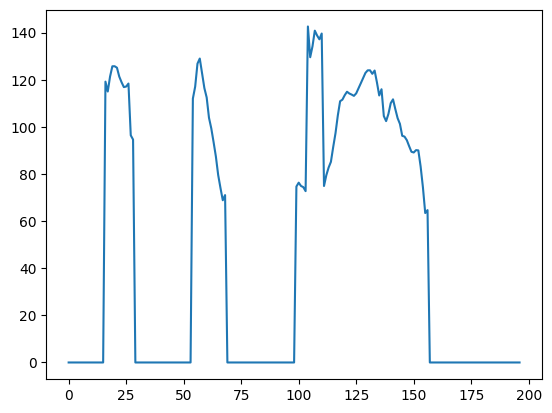

In [7]:
plt.plot(f0)

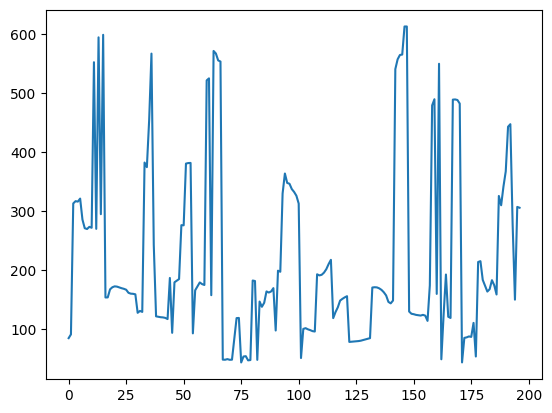

In [8]:
plt.plot(pitch)

In [4]:
load_pitch_from_disk = False
durations_from = 'attn_prior'

In [14]:
(not load_pitch_from_disk) and (durations_from != 'attn_prior')

False

In [25]:
from  import commons

ModuleNotFoundError: No module named 'Emovoice'

In [5]:
import sys
sys.path.append('../../Emovoice')

import numpy as np
import torch
from commons import TacotronSTFT
from utils import load_filepaths_and_text, load_speaker_lang_ids, load_wav_to_torch, to_gpu

In [6]:
torch_stft = TacotronSTFT(
                512, 256, 512,
                80, 22050, 0.0, 8000.0)

In [7]:
audio, sampling_rate = load_wav_to_torch("0011_000361.wav")
audio_norm = audio / 32768.0
audio_norm = audio_norm.unsqueeze(0)
audio_norm = torch.autograd.Variable(audio_norm, requires_grad=False)
melspec, energy = torch_stft.mel_spectrogram(audio_norm)
melspec = torch.squeeze(melspec, 0)
energy = torch.squeeze(energy, 0)

In [8]:
melspec.shape

torch.Size([80, 197])

In [48]:
energy.numpy().shape

(197,)

In [47]:
energy.numpy().dtype

dtype('float32')

In [3]:
lol =1

In [4]:
if lol:
    print("Lah")

Lah


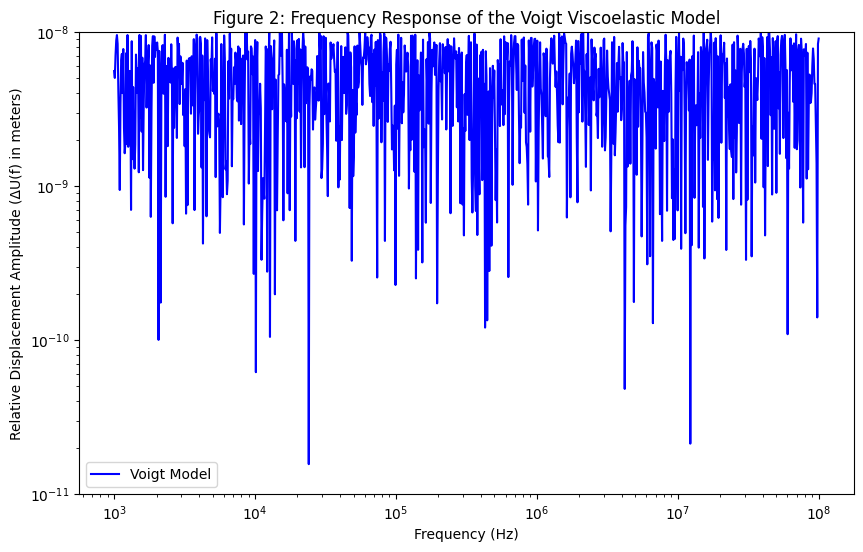

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the frequency range
frequency = np.logspace(3, 8, num=1000)  # from 10^3 to 10^8

# Define the Voigt model function to calculate relative displacement amplitude
def voigt_model(frequency):
    # Voigt model calculations (use appropriate formula)
    # Placeholder for the actual Voigt model calculation
    delta_U = np.random.uniform(low=1e-11, high=1e-8, size=frequency.shape)
    return delta_U

# Calculate the relative displacement amplitude using the Voigt model
delta_U = voigt_model(frequency)

# Plotting the figure
plt.figure(figsize=(10, 6))
plt.loglog(frequency, delta_U, label='Voigt Model', color='blue')

# Labeling the axes
plt.xlabel('Frequency (Hz)')
plt.ylabel('Relative Displacement Amplitude (ΔU(f) in meters)')

# Setting the y-axis limits
plt.ylim(1e-11, 1e-8)

# Adding a legend
plt.legend()

# Adding a title
plt.title('Figure 2: Frequency Response of the Voigt Viscoelastic Model')

# Display the plot
plt.show()
